# Final Project Baseline: House Prices- Advanced Regression Techniques
### Author: Radia Abdul Wahab, Parham Motameni, Jun Qian
### Date: Fall 2021
### Course: w207 Machine Learning



# 

## **Table of Contents:**

#### **Project Summary**

#### **Description of Data and Data source**

#### **Installations and Libraries**

#### **Dataset Exploratory Analysis**

>Nominal/Ordinal data

>Categorical data


#### **Step-By-Step performance of algorithms**

>OLS regression

>Decision tree

>Random forest



#### **Conclusion**

#### **Further work for final submission**


# Project Overview

## **Motivation**:
How much would you pay for a house? That is often one of the hardest questions to answer. When buying a house or selling a house, it is very crucial to determine the right pricing, since house prices change over time and each house its own "$ rating". 

Three main aspects determine the price of a house. 
1. Condition
2. Features (Number of rooms, square footage etc)
3. Location
    
These 3 properties can be defined under a large set of sub-properties. The **Ames Housing dataset** was compiled by **Dean De Cock**, with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This data set (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) is being used for this project to demonstrate the use of various Machine Learning techniques, to be able to have the algorithm perform the difficult task of deciding what the house price should be. 

 
## **Baseline Project Goals**: Through this baseline project we are trying to answer 3 main questions:
1. What combination of aspects of a house most determines the sale-price?
2. Can Regression based prediction be used to estimate the price of the house?
3. What is the best accuracy that can be achieved by using such algorithms?
4. Are there any other ML models which can achieve a better prediction?


## **Baseline Overall Strategy**: The general strategy we followed to come to the conclusion has been:
1. Thorough review of the description of data provided (including background research)
2. Reviewing ALL of the variables, in order to avoid omitted variable bias. 
3. EDA of ALL integer based paremeters
4. EDA ordinal/categorical parameters  
5. Shortlisting parameters that show strong trends but control potential collearity
6. Perform Regression using the shortlisted parameters
7. First pass accuracy assessment of basic linear regression without any data cleaning
to be used in KNN/decision tree based algorithms for later stages of project including final submission



We have answered the above questions stated under "Baseline Project Goals" by Exploring the data (EDA) and performing Linear Regression on a selected set of parameters. The outcome is delailed below

## **Outcome**:

1. The 10 important parameters are: ...
2. Linear regression line fit can be obtained
3. Accuracy of prediction with a linear regression fit is >80%

## **Baseline Submission Content**:
For this baseline submission we show an overview of exploratory data analysis (EDA), and demonstrate the data  with sufficient visuals. We then set up a pipeline to demonstrate feasibility of using this data to perform prediction on house prices. 

In this report we have also included:

1. The format of the data
2. The various paremeters given
3. Correlation and Distribution of the integer based parameters by visualization
4. Boxplot of the categorical parameters 
5. Short listed parameters and justification for choice
6. Demonstration of a simple regression algorithm to show a regression fit
7. Visualizaion of regression line fit 
8. Visualization of actual vs predicted values to demonstrate fit
9. Accuracy estimates
10. Summary Statistics?
11. Conclusion
12. Further work
   

## **Further work**:

1. Apply alternative feature selection algorithms 
2. Descripencies of those parameters and how those will effect us
3. Look further into regression results interpretation. Potentially also advanced regression techniques(tbd)
3. Removing outliers, redoing linear regression, recalculating accuracy to show improvement


# Description of Data and Data Source

- **Data Source**:

- **Description of Data**:

## Import all Libraries:

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
from pathlib import Path
import seaborn as sns
import pandas as pd
import numpy as np
import time
import random
import scipy.io as sio
import warnings

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# sklearn
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.feature_selection import RFE


# internal modules
from elastic_net_regressor import ElasticNetRegressor
from linear_regressor import LinearRegressor
from decision_tree_regressor import DecisionTreeRegressor
from lasso_regressor import LassoRegressor
from random_forest_regressor import RandomForestRegressor
from ridge_regressor import RidgeRegressor
from neuralnetwork import create_nn_regressor
from data_loader import DataLoader
from configurations import args

%matplotlib inline


warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [3]:
# download data file if it is not ready
data_file = Path(args.data_path)
if data_file.is_file():
    print("Datafile is already loaded.")
else:
    !curl -L "https://drive.google.com/uc?export=download&id=1ortEJfmlpt9-dbg5f6cTDt5nicswf5wT" > 'test.csv'
    !curl -L "https://drive.google.com/uc?export=download&id=1EG5jP5RDEIsNAMaF2m42KOyz-ZVjC8wS" > 'train.csv'
data_loader = DataLoader(args)
df = data_loader.df


Datafile is already loaded.


In [4]:
# lock the seed to have repeatable results
random.seed(100)

## Taking a look at what the features are
Additionally reviewed the data_description.txt file. The column names and the names on the file correspond accurately

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Check whether there are variables with significant missing values. 

It looks like PoolQC , MiscFeature, Alley, Fence, FireplaceQu,LotFrontage have substantial missing values. 

Looking closer into the descriptions of these variables, we find most NA actually means the house does not have such feature. So we fill it with "NonExist" as a distinct category.

In [6]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [7]:
# Fill missing value of 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu' as NonExist. Leave LotFrontage for further investigation
df[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']]=df[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']].fillna('NonExist')
df.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage     259
GarageFinish     81
GarageCond       81
GarageYrBlt      81
GarageQual       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtFinType1     37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
BsmtHalfBath      0
BsmtFullBath      0
FireplaceQu       0
Fireplaces        0
FullBath          0
Functional        0
dtype: int64

## Split training data into our own train and test data:


#### The "test.csv" is an unlabelled set. Therefore in order to assess performance we are splitting the train.csv into our own training, development and test set as needed
#### We are using split() to ensure random distribution of data points
#### We are starting off with ~10% of the train set into a test group

In [8]:
# Create train, dev, test datasets

# split data into Test and train
X_train, X_test, y_train, y_test = train_test_split(
    data_loader.df_X, data_loader.df_y, test_size=0.10, random_state=1)

# TODO split more to dev set if needed!


## Initial Look at the data:


In [9]:
print(f'X_train size: {X_train.shape}, X_test size: {X_test.shape}')
print(f'yy_train size: {y_train.shape}, y_test size: {y_test.shape}')
X_train.head()

X_train size: (1314, 79), X_test size: (146, 79)
yy_train size: (1314, 1), y_test size: (146, 1)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
418,50,RL,60.0,8160,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2007,WD,AdjLand
782,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
1338,60,RL,95.0,13450,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
931,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,7,2009,WD,Normal
780,20,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


Above result shows that
1.  The **train** set has **1314** records (1314 labelled houses)
2.  The **test** set has **146 long** records (146 labelled houses)
3.  Each house has **79 features**. 
4.  Features are a mix of **nominal, ordinal, and categorical**
5.  We will have to be cognisant of the different data types for our assessments


### Analyzing bathroom features impact on house price


Here we analyze the relation between the number of bathrooms and the sales price. There are four features in the dataset presenting the bathrooms, full and half bathrooms for both basements and above the ground. Here we analyze each of the features individually and then in combined form. To combine them, we verify two approaches, one considering each half-bath as .5 of a full-bath, and for the other one, we consider each bath as one no matter if it is full or half.

In [10]:
def plot_features(feature_set, output_set, feature_per_row=2,
    width=15, height=20):
    plt.figure(figsize=(width, height))
    number_features = feature_set.shape[1]
    num_rows = number_features // feature_per_row
    num_rows = num_rows if number_features % feature_per_row == 0 \
         else num_rows + 1
    k = 1
    for feature in feature_set:
        output = ['SalePrice']
        plt.subplot(num_rows, feature_per_row, k)
        plt.yticks([])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.scatter(feature_set[feature].values, output_set[output].values)
        k = k+1
    plt.show()

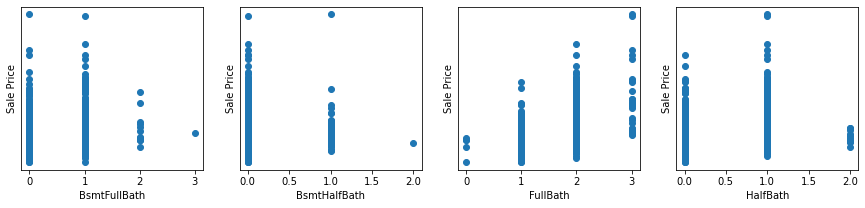

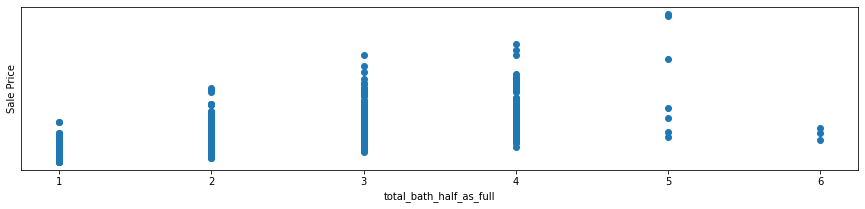

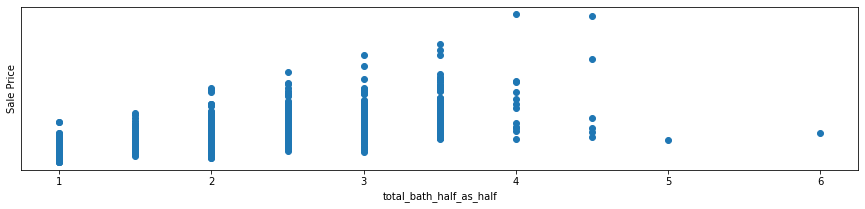

In [11]:
# bathrooms impact on price
def analyze_num_bath_impact():
    f_baths = X_train[['BsmtFullBath',
                            'BsmtHalfBath', 'FullBath', 'HalfBath']].copy()
    plot_features(f_baths, y_train, feature_per_row=4, height=3)
    f_baths['total_bath_half_as_full'] = \
        data_loader.get_bath_features_dataset(f_baths, consider_half_as_full=True)['total_bath']
    plot_features(f_baths[['total_bath_half_as_full']],
                  y_train, feature_per_row=1, height=3)
    f_baths['total_bath_half_as_half'] = \
        data_loader.get_bath_features_dataset(f_baths, consider_half_as_full=False)['total_bath']
    plot_features(f_baths[['total_bath_half_as_half']],
                  y_train, feature_per_row=1, height=3)

analyze_num_bath_impact()


**Number of the bathrooms analysis result**

The number of bathroom analysis shows that using the total number of bathrooms considering half-bath as half reveals more granular details about the relation between the number of bathrooms with the sales price better than other approaches. So we will use the half_as_half in our analysis.

## Analysis on SalePrice

For SalePrice,  we use the mean price and variation range to determine whether we should seperate the sales price into before and after financial crisis. The observations are:
1. We do see a trend change from upward to decrease/flat in price 


2. However, the difference is only around 5% with a similar variation. As a result, in this stage, we keep it as is for cross sectional analysis. We might look into it further later.


3. We identify some months the sales price is significantly higher


In [12]:
#try to explore the impact of financial crisis to house prices#
df_train=y_train.merge(X_train, how="inner",left_index=True,right_index=True)
df_train[['SalePrice','YrSold']].groupby(['YrSold']).mean()

,SalePrice
YrSold,
2006,180787.411348
2007,186458.197952
2008,178579.735714
2009,179110.766447
2010,178996.129032


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

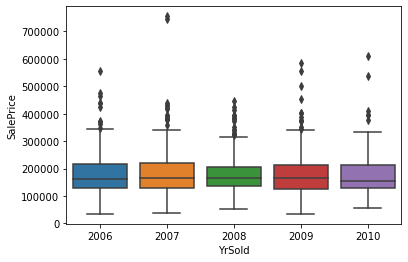

In [13]:
sns.boxplot(x= df_train['YrSold'], y= df_train['SalePrice'])

In [14]:
df_train[['SalePrice','MoSold']].groupby(['MoSold']).mean()

,SalePrice
MoSold,
1,183280.433962
2,178890.068182
3,185002.376344
4,170836.335878
5,172491.028090
6,178583.600000
7,183577.447115
8,186014.362832
9,197822.745763


<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

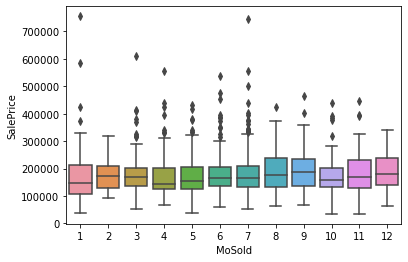

In [15]:
sns.boxplot(x= df_train['MoSold'], y= df_train['SalePrice'])

# First pass with nominal values

First we work on the nominal variables.

I would like to see how the data points are correlated and distributed, before any data cleaning

In [16]:
#pass training dataset to a sepearate EDA dataframe
df_EDA=y_train.merge(X_train, how="inner",left_index=True,right_index=True)

## First step exploratory data analysis:

We classify the features into two types of variables: Numerical and Categorical. 

For all the numerical variables, we plot the correlations heatmap between the dependent variable SalePrice and all the features. 




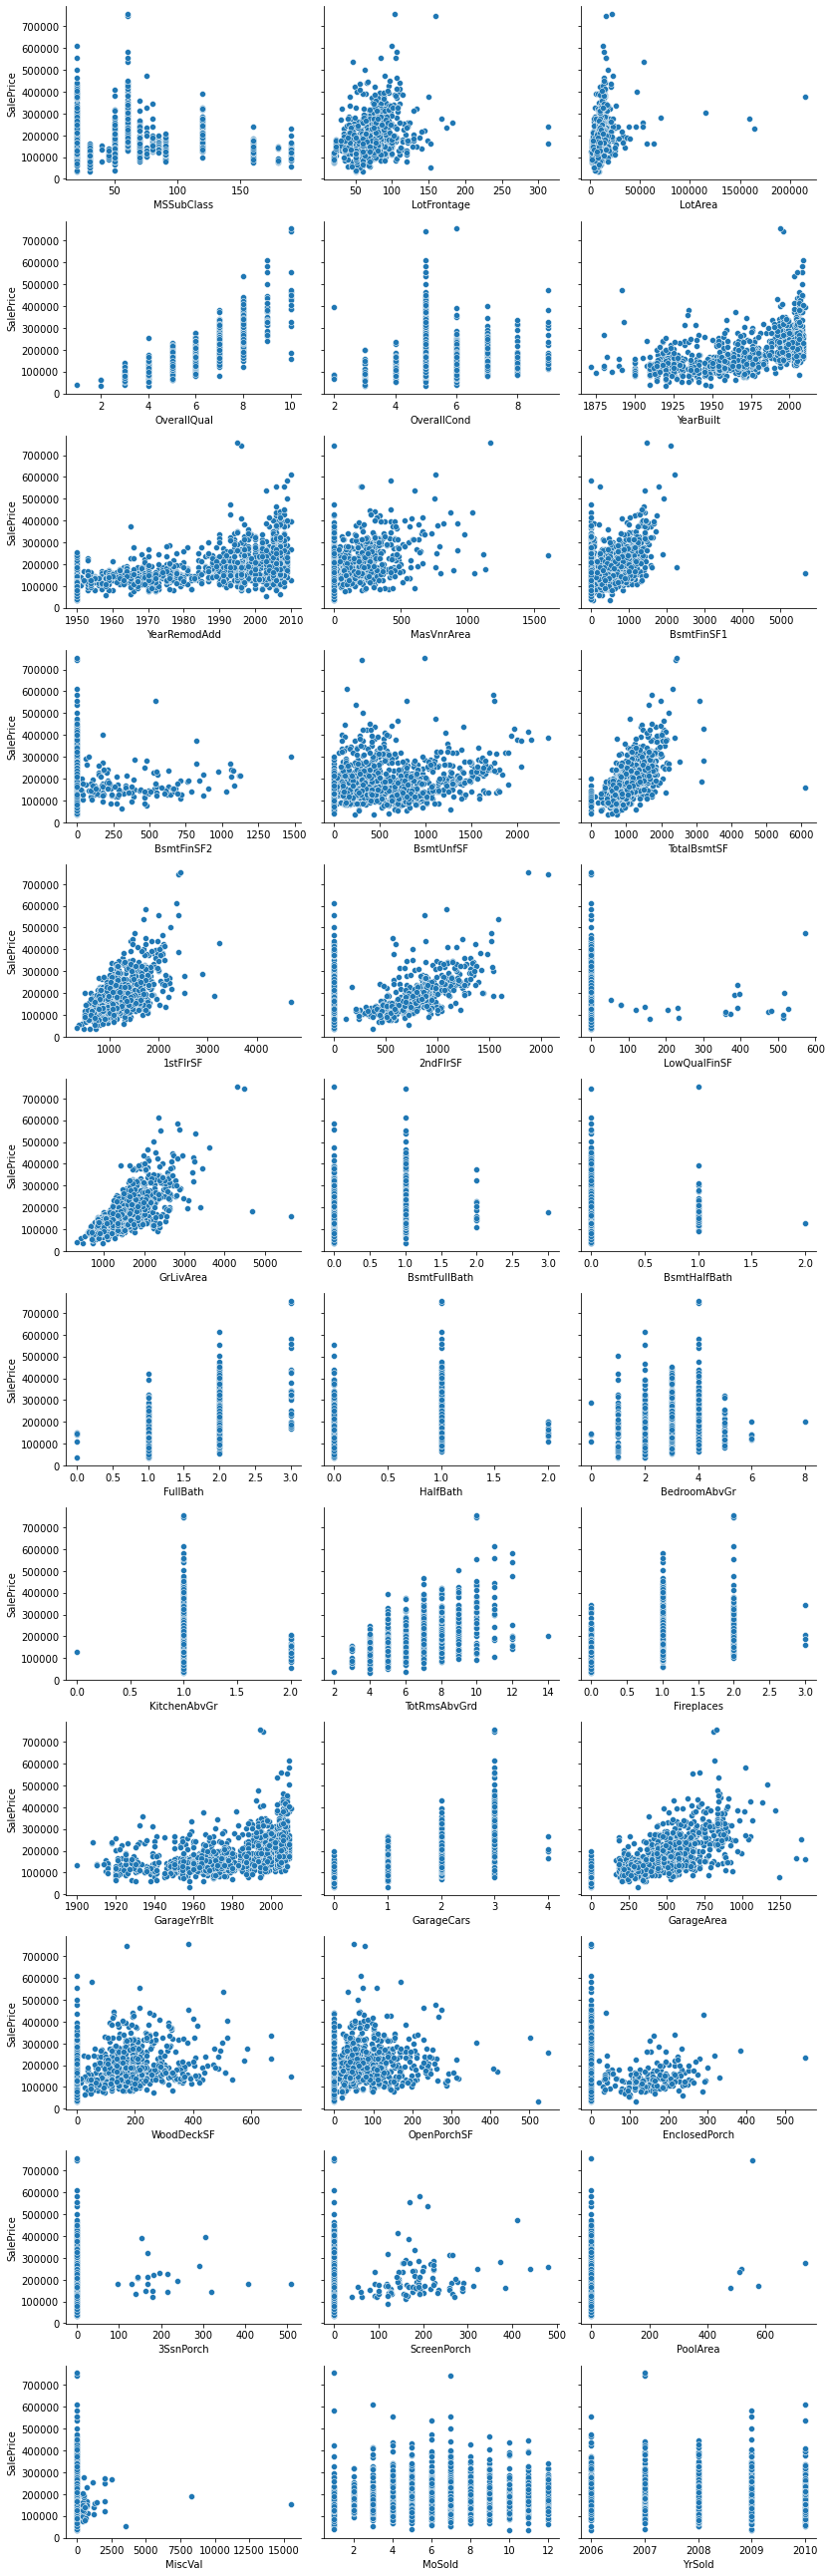

In [17]:
# Using the shortlisted feature list, run a for loop to plot all the data points
# int_feature_list has been created a few cells above
# int_feature_list contains all the columns that have some sort of numbers in them (int, float etc)
def plot_numerical_scatter_plots():

    ## all numeric variables##
    # TODO: Not all non object ones are Numerical, for example the Overal Cond
    df_num_list = df_EDA.select_dtypes(exclude={'object'}).columns.to_list()
    df_num_list.remove('SalePrice')
    g = sns.FacetGrid(pd.DataFrame(df_num_list), col=0, col_wrap=3, aspect=1.3,
    sharex=False)
    for ax, x_var in zip(g.axes, df_num_list):
        sns.scatterplot(data=df_EDA, x=x_var, y='SalePrice', ax=ax)
    g.tight_layout()
    
plot_numerical_scatter_plots()


# Final Project Baseline: House Prices- Advanced Regression Techniques
### Author: Radia Abdul Wahab, Parham Motameni, Jun Qian
### Date: Fall 2021
### Course: w207 Machine Learning



# 

 ## Now we look at the correlation between these features as well as with the SalePrice

In [18]:
def get_core_matrix():
    df_num_list = df_EDA.select_dtypes(exclude={'object'}).columns.to_list()
    return df[df_num_list].corr()


corr_matrix = get_core_matrix()


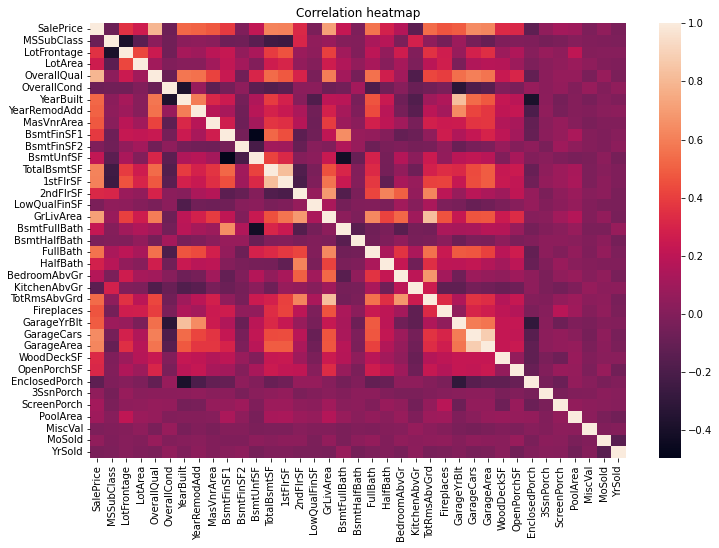

In [19]:
def plot_heatmap_for_all_features(corr_matrix):
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix)
    plt.title("Correlation heatmap")

plot_heatmap_for_all_features(corr_matrix)


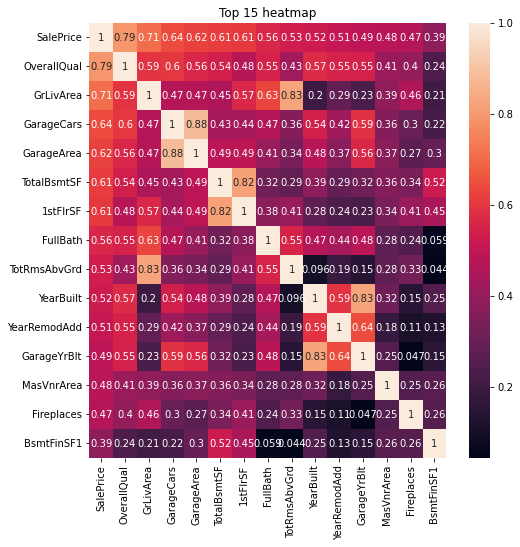

In [20]:
##Pick the top 15 correlated features##
def plot_heatmap_for_top_15(corr_matrix):
    top15_corr = corr_matrix.sort_values('SalePrice', ascending= False)[0:15]
    top15_corr = top15_corr.loc[:, top15_corr.index]

    fig = plt.figure(figsize= (8, 8))
    sns.heatmap(top15_corr, annot= True)
    plt.title("Top 15 heatmap")


plot_heatmap_for_top_15(corr_matrix)


### In this section we review ALL the variables with the plots above as well as the description provided to us in data_description.txt




1. **MSSubClass**: Identifies the type of dwelling involved in the sale.

Need to convert this to categorical, or ordinal. For Baseline we will not be using this. In terms of conversion to ordinal, this is not ordered currently. We will need to identify what criteria should be used to order these. However, this variable determines the type of property and is ultimately a critical feature that needs to be captured in the final ML algorithm.

2. **LotFrontage**: Linear feet of street connected to property

Need to remove values above 200. They are clearly outliers that are skewing the data on the right

Once we remove the outliers, we should see a good correlation, visually

3. **LotArea**: Lot size in square feet

This is an important parameter

However, looking at the scatter plot, I would say there are a few outliers that significantly skew the data

we should remove any values that are >50K and perform our final analysis.

Once we remove the outliers above 50k, we should get a reasonable correlation

4. **OverallQual**: Rates the overall material and finish of the house

Similar to the MSSubClass, this is actually a ordinal variable with a numerical rating. 

From the description.txt, it seems like it is ordered in the right way. 

5. **OverallCond**: Rates the overall condition of the house

Same feedback as OverallQual

6. **YearBuilt**: Original construction date

Can be used as-is for now. Keeping in mind, this is a time variable

7. **YearRemodAdd**: Remodel date (same as construction date if no remodeling or additions)

This is a tricky parameter. we need to figure out what to do with the data points where the house was not remodeled but is copying the construction date

Looking at the scatter plot, rest of the data points seem good. My only concern is the piling up of data on 1950

Also need to keep in mind this is a time variable

8. **MasVnrArea**: Masonry veneer area in square feet
Need to remove zero value 

Asses with  vs without Masonry veneer (consider using as binary variable in the final ML)
Then if with Masonry veneer, perform correlation assessment. 

9. **BsmtFinSF1**: Type 1 finished square feet
Need to remove zero values

Asses with basement vs without (consider using binary assessment)
Then if with basement, need to remove '0' values and perform correlation

10. **BsmtFinSF1**: Type 1 finished square feet, **BsmtFinSF2**: Type 2 finished square feet, **BsmtUnfSF**: Unfinished square feet of basement area. **TotalBsmtSF**: Total square feet of basement area

Remove zeros
Identify creative ways to combine these variables into one, and use some form of a rating to convert into ordinal to perform assessment. Or use decision tree.

11. **1stFlrSF**: First Floor square feet, **2ndFlrSF**: Second floor square feet

Perform assessment on total square feet.

For second floor square feet, remove the zero values

12. **LowQualFinSF**: Low quality finished square feet (all floors)

This to me should be a binary classifier. There is a vertical line on zero, and all other data points can be represented with almost a horizontal line

13. **GrLivArea**: Above grade (ground) living area square feet

Destribution of data point is almost identical to 1stFlrSF. This is not a suprise. I don't think we should include this variable. This will diminish the effects of the original variable (1stFlrSF or overall SF)

14. **BsmtFullBath**: Basement full bathrooms, **BsmtHalfBath**: Basement half bathrooms, **FullBath**: Full bathrooms above grade, **HalfBath**: Half baths above grade

All bathroom formats should be combined into a ordinal format. Need to figure out how. we could do it based on mean. The higher the mean sale price, higher the ordinal value.

15. **Bedroom**: Bedrooms above grade (does NOT include basement bedrooms), **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

Traditionally, this is a huge contributing factor. Lets see how we can capture this

Need to combine Bedrooms and total room somehow

Decision tree might be a good option for this

16. **Kitchen**: Kitchens above grade

Very interesting distribution. seems to be a negative correlation

17. **Fireplaces**: Number of fireplaces

I think we can deprioritize this variable for now, but include in final ML

18. **GarageYrBlt**: Year garage was built

This is an important variable. Can use as is. But need to remove zeroes

19. **GarageCars**: Size of garage in car capacity

important variable. looks like good correlation

20. **GarageArea**: Size of garage in square feet

Good variable. Need to remove zeroes

21. **WoodDeckSF**: Wood deck area in square feet, **OpenPorchSF**: Open porch area in square feet, **EnclosedPorch**: Enclosed porch area in square feet, **3SsnPorch**: Three season porch area in square feet, **ScreenPorch**: Screen porch area in square feet, **PoolArea**: Pool area in square feet

These can be combined into some "additional amenities". can keep the sqft measure. need to decide

In any case, need to remove zeroes. 

22. **MiscVal**: $Value of miscellaneous feature

Need to figure out how we can include this. I dont think we can add the value to the total. because value of misc features might actually hold lesser real value.

will deprioritize this for now and think about it. 

23. **MoSold**: Month Sold (MM), **YrSold**: Year Sold (YYYY):

Effects of year seems to be limited. Month to Month variability is more significant.

## The correlations heatmap shows:


###  1. Below features are highly correlated with SalePrice: 

- OverallQual
- GrLivArea 
- GarageCars 
- GarageArea 
- TotalBsmtSF
- 1stFlrSF 
- FullBath 
- TotRmsAbvGrd 
- YearBuilt
- YearRemodAdd  

###  2. However, there are high correlations also between features themselves

-  OverallQual & most other variables
-  GrLivArea & TotRMAbvGrd &  FullBath 
-  GarageCares & GarageArea
-  TotalbsmtSF & 1stFlrSF
-  BsmtFinSF1 & TotBsmtSF

### 3. For first round baseline, we will include below nominal features:

-  Yearbuilt 
-  YearRemodAdd 
-  GrLivArea 
-  TotalBsmtSF 
-  GarageCars
-  OverallQual
-  LotArea??

### Second pass all the categorical variables

we plot the box plots to see whether any category in the variable has a significant different SalePrice. We conclude as below:

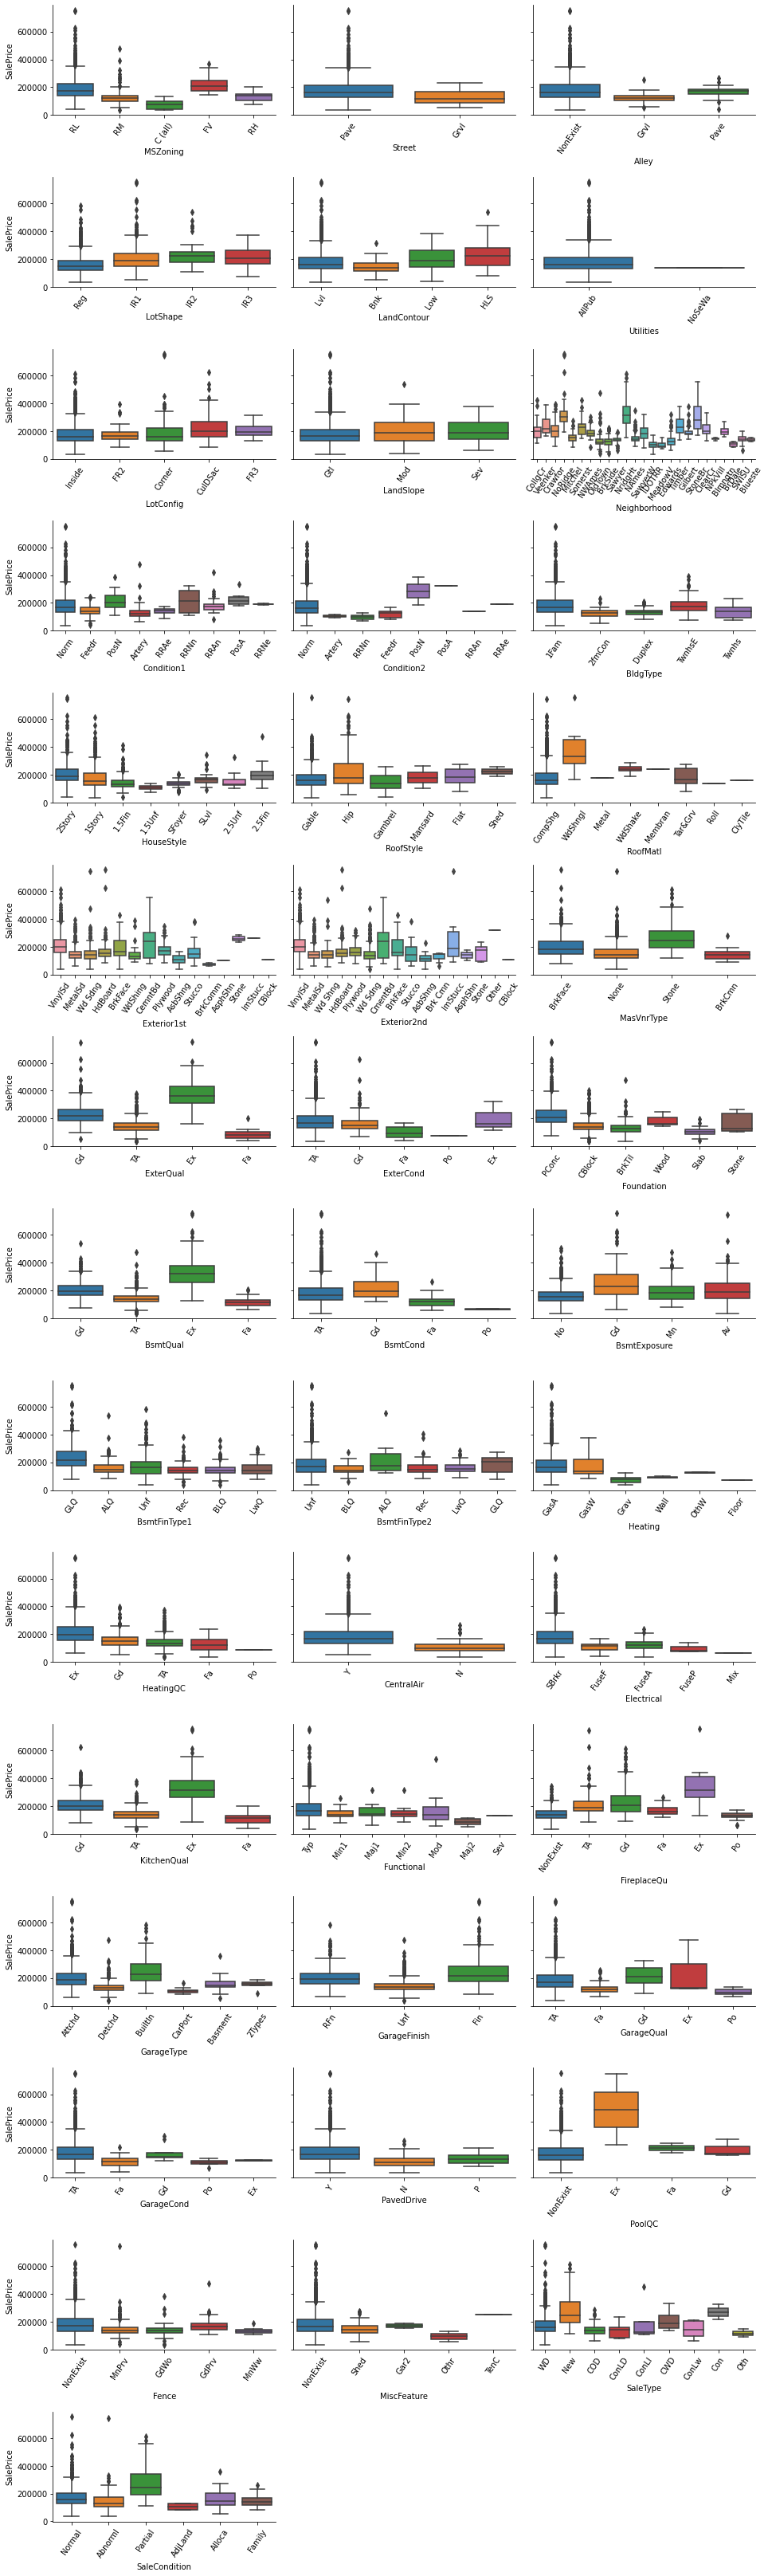

In [21]:
#box plot to explore categorical variables
def plot_categorical_boxplots():
    #all text variable (categorical)#
    df_txt_list=df_EDA.select_dtypes(include={'object'}).columns.to_list()
    g = sns.FacetGrid(pd.DataFrame(df_txt_list), col=0, col_wrap=3, aspect=1.5,
        sharex=False, sharey=True)
    for ax, x_var in zip(g.axes, df_txt_list):
        sns.boxplot(data=df, x=x_var, y='SalePrice', ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=55)
    g.tight_layout()
    

plot_categorical_boxplots()


### For all the categorical variables, we plot the box plots to see whether any category in the variable has a significant different SalePrice. We conclude as below:

####  1. Below features are highly correlated with SalePrice: 


- The features related to location:

    1. Neighborhood: some neighborhoods have significant higher mean price.
    2. MSZoning: FV(Floating Village(FV) is a special area where a retirement community was developed and have a higher mean price. Commercial has low mean price. 
    3. Condition1/Condition2: if there are positive off-site facilities, the prices of properties are higher.

- Generally all "quality" features, when the quality is excellent or good, the prices is significantly higher.

    4. BsmtQual
    5. KitchenQual
    6. exterCond
    7. PoolQC

- Features related to the house:

    8. MasVnrType: Stone Veneer is higher. 
    9. GarageType:  BuiltIn is meaningfully higher


####  2. However, there are high correlations also between features themselves(will explore more):

Such as all quality features, the quality with whether the house has heating and central air

#### 3. Some features we will further explore: 

    1. LandContour
    2. BldgType:  TwnhsE/TwnhsI  might have info but not obvious
    3. HouseStyle: has info but might be correlated with house sqft
    4. RoofMati: has significant difference in values but might also add noises
    5. 'ExterQual'/ 'ExterCond': check correlation with other quality
    6. BsmtExposure: Gd(good exposure) or No has significant differences in price. check correlation with BsmtQual
    7. BsmtFinType1:
    8. Exterior1st&2nd
    9. functional
    10. saletype: new construction is higher but correlated? with yr built
    11. SaleCondition'
    12. FireplaceQu
    13. Heating
    14. Central Air
    15. HeatingQual
    16. garageQual


## From the above assessment it is clear that we might need to heavily depend on learning algorithms that are designed for categorical data as well as nominal data

## At this point we will make two lists of "Important Variables" from either category, so we can perform an initial baseline assessment

## Below Nominal/Ordinal Variables are prioritized for baseline


1. Yearbuilt
We will further process this feature as age of the house (Current Year - Yearbuilt)
2. YearRemodAdd
We will further process this feature as age of the remodel (Current Year - YearRemodAdd)
3. GrLivArea
4. Bathroom (Need to sum all the types)
5. GarageCars


## Below Categorical Variables are prioritized for baseline


1. MSSubClass
2. MSZoning
3. KitchenQual
4. Neighborhood


## Selecting a set of feature to work on (THIS IS POST BASIC ANALYSIS STEP)



These features are selected based on analysis and impact of them on the price

['MSSubClass', 'MSZoning', 'LotArea', 'Utilities',
                            'Neighborhood', 'OverallQual', 'Age', 'RemodAge',
                            'KitchenQual', 'TotalBsmtSF',
                            'GarageCars', 'MoSold', 'GrLivArea', 'total_bath']
  

## Encoding Categorical Features

## Split data into test and train sets

# Validating Different Regressor

Here we are training multiple regression models on the Training set and at the end we compare the results

## Base Regressor 
Using this as the base class for all regressor to share the common diagnostics like: Plotting RMSE, and other diagnostics plots

In [22]:
class BaseRegressorPlot():  
  @staticmethod
  def plot_predicted_vs_actual(ax, regressor):
    if args.log_level == 'verbose':
      print('get_predicted_vs_actual')
    predicted, actual = regressor.get_predicted_vs_actual()
    ax.scatter(predicted, actual)
    ax.set_xlabel("Predicted Sales Price ($)")
    ax.set_ylabel("Sales Price ($)")
  
  @staticmethod
  def plot_learning_curves(ax, regressor, scaled_data=False):
    if scaled_data:
        X_train, X_val, y_train, y_val = data_loader.get_scaled_clean_encoded_data()
    else:
        X_train, X_val, y_train, y_val = data_loader.get_clean_encoded_data()
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        regressor.fit(X_train[:m], y_train[:m])
        y_train_predict = regressor.predict(X_train[:m])
        y_val_predict = regressor.predict(X_val)
        # calculate RMSE
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict,
                                               squared=False))
        val_errors.append(mean_squared_error(
            y_val, y_val_predict, squared=False))
    # ax.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    # ax.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    ax.plot(train_errors, "r-+", linewidth=2, label="train")
    ax.plot(val_errors, "b-", linewidth=3, label="val")
    ax.set_xlabel("Number of samples")
    ax.set_ylabel("RMSE")

  @staticmethod
  def plot_history_loss(ax, regressor,  scaled_data=True):
    # if scaled_data:
    #     X_train, X_val, y_train, y_val = data_loader.get_scaled_clean_encoded_data()
    # else:
    #     X_train, X_val, y_train, y_val = data_loader.get_clean_encoded_data()
    ax.plot(regressor.get_history_loss())
  
  @staticmethod
  def plot_rmse(ax, regressor,  scaled_data=True):
    # if scaled_data:
    #     X_train, X_val, y_train, y_val = data_loader.get_scaled_clean_encoded_data()
    # else:
    #     X_train, X_val, y_train, y_val = data_loader.get_clean_encoded_data()
    ax.plot(regressor.get_mean_squared_error())

  @staticmethod
  def clean_out_plot(ax):
    ax.set_axis_off()


## Linear Regression

In [23]:
def analyze_linear_regression():
    X_train, X_test, y_train, y_test = data_loader.get_clean_encoded_data()
    regressor = LinearRegressor()
    regressor.fit(X_train, y_train)
    
    # plot dignostics
    fig, axes = plt.subplots(2, 2, figsize=(10, 5))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0, 0], regressor)
    BaseRegressorPlot.plot_learning_curves(axes[0, 1], regressor)
    plt.scatter(y_test, regressor.predict(X_test))
    y_predict_test = regressor.predict(X_test)
    print("RMSE:" + str(mean_squared_error(y_test, y_predict_test, squared=False)))

if not 'linear' in args.list_of_sections_to_skip:
    analyze_linear_regression()


## Regularized Regressions
- Rigde Regression
- Lasso Regression
- Elstic Net

## Ridge Regression
In this section we analyze Ridge regression 

Ridge is regularized version of linear regression

It adds $ \Sigma_{\ i=1}^{\ n} \ \theta_i^{\ 2}$  regularization term to cost function to keep the model weight as samll as possible.

Ridge Regression cost function:

$$ J(\theta) \ = \ MSE(\theta) + \alpha \ \frac{1}{2} \Sigma_{\ i=1}^{\ n} \ \theta_i^{\ 2} $$

In [24]:
def analyze_ridge_regression():
    X_train, X_test, y_train, y_test = data_loader.get_clean_encoded_data()
    regressor = RidgeRegressor()
    regressor.fit(X_train, y_train)
    
    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor) 
    BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test),squared=False))

if not 'ridge' in args.list_of_sections_to_skip:
    analyze_ridge_regression()


## Lasso Regression

Lasso adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm

Lasso Regression cost function

 $$ J(\theta) \ = \ MSE(\theta) + \alpha \  \Sigma_{\ i=1}^{\ n} \ |\theta_i| $$

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero).

In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

Note: Lasso regression has $\alpha$ as hyperparmeter which needs to be searched 

In [25]:
def analyze_lasso_regression():
    X_train, X_test, y_train, y_test = data_loader.get_clean_encoded_data()
    # TODO later use search for alpha
    regressor = LassoRegressor(alpha=0.1)
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))

if not 'lasso' in args.list_of_sections_to_skip:
    analyze_lasso_regression()


## Elastic Net

For Elastic Net regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression

Elastic Net cost function

$$ J(\theta) \ = \ MSE(\theta) + r \alpha \  \Sigma_{\ i=1}^{\ n} \ |\theta_i| +  \frac{1-r}{2} \alpha \ \Sigma_{\ i=1}^{\ n} \ \theta_i^{\ 2}$$


In [26]:
def analyze_elasticnet_regression():
    X_train, X_test, y_train, y_test = data_loader.get_clean_encoded_data()
    # TODO later use search for alpha
    regressor = ElasticNetRegressor(alpha=0.1, l1_ratio=0.5)
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))

if not 'elasticnet' in args.list_of_sections_to_skip:
    analyze_elasticnet_regression()


## Decision Tree

In [27]:
def analyze_decision_tree_regression():
    X_train, X_test, y_train, y_test = data_loader.get_clean_encoded_data()
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))


if not 'decisontree' in args.list_of_sections_to_skip:
    analyze_decision_tree_regression()


## Random Forest

In [28]:
def analyze_random_forest_regression():
    X_train, X_test, y_train, y_test = data_loader.get_clean_encoded_data()
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))


if not 'randomforset' in args.list_of_sections_to_skip:
    analyze_random_forest_regression()


## Neural Net

Note: for Neural Net we need to use Scaled Input

In [29]:
def analyze_neuralnet_regression():
    X_train, X_test, y_train, y_test = data_loader.get_clean_encoded_data()
    regressor = create_nn_regressor(X_train, X_test, y_test, epochs=2)
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(2, 2, figsize=(10, 5))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0][0], regressor)
    BaseRegressorPlot.plot_history_loss(axes[0][1], regressor)
    BaseRegressorPlot.plot_rmse(axes[1][0], regressor)
    BaseRegressorPlot.clean_out_plot(axes[1][1])

if not 'neuralnet' in args.list_of_sections_to_skip:
    analyze_neuralnet_regression()


## Feature Selection

1. Filter method
-  using correlation to identify important features
-  using mutual information (enthropy based)to identify imporatnt features

1.1 Corrlation based feature selection 


(can be potentially better integrated with the EDA corrlation part)

In [76]:
# df_fs = data_loader.df
X_train_fs, X_test_fs, y_train_fs, y_test_fs = data_loader.get_raw_split_fs()


In [77]:
args.list_of_sections_to_skip=[]

In [78]:
# TODO why did you keep this? Remove after investigation => Jun
X_train_fs.columns[X_train_fs.isna().sum(axis=0) > 0]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [79]:
X_filter_fs = data_loader.data_prep(X_train_fs)


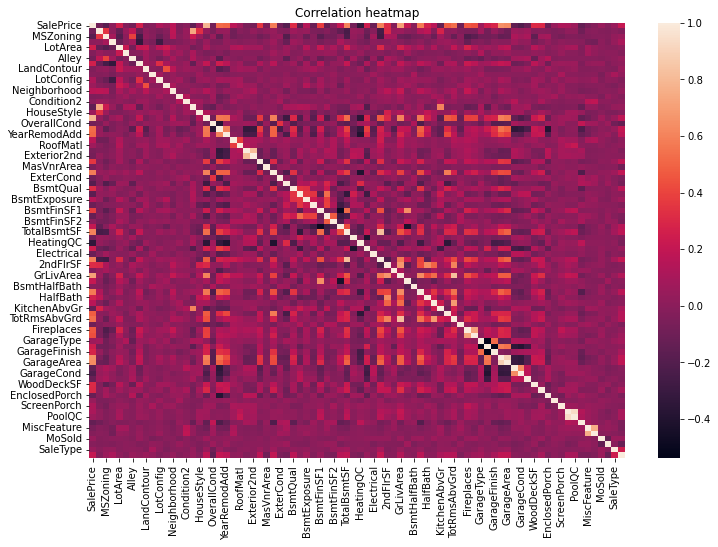

In [80]:
def get_plot_correlation(X_train_fs, y_train_fs):
    ''' 
    compute and plot the corr matrix with all features
 
    '''
    df_corr = y_train_fs.merge(
        X_train_fs, how="inner", left_index=True, right_index=True)
    corr_matrix = df_corr.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix)
    plt.title("Correlation heatmap")

    return corr_matrix


corr_matrix = get_plot_correlation(X_filter_fs, y_train_fs)


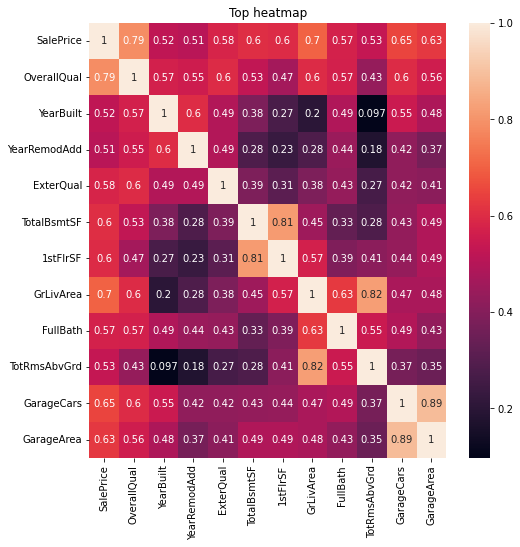

In [81]:
# get only the features with correlation above cutoff

def get_plot_heatmap_top(corr_matrix, thredshod=0.5):
    ''' 
    get above thredshod -- correlation with saleprice above **
    plot the correlation heatmap
    
    '''

    top_corr = corr_matrix[corr_matrix["SalePrice"] > thredshod]
    top_corr = top_corr.loc[:, top_corr.index]

    fig = plt.figure(figsize=(8, 8))
    sns.heatmap(top_corr, annot=True)
    plt.title("Top heatmap")

    return top_corr


top_corr = get_plot_heatmap_top(corr_matrix)


1.2 Mutual Information based feature selection

In [82]:
#calculate mutual infomation and plot

def make_mi_scores(X, y):

    # All discrete features should now have integer dtypes

    mi_scores = mutual_info_regression(X, y,  random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    scores = scores
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


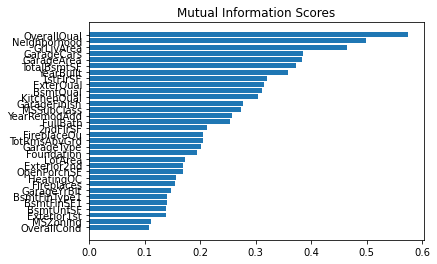

In [83]:
# get miscore above 0.1 ( will try 0)

mi_scores = make_mi_scores(X_filter_fs, y_train)
plot_mi_scores(mi_scores[mi_scores > 0.1])


1.3 Merge to get the final filtered features

In [94]:
# TODO => Jun Remove this and only keep the result of investigaton
# have a look at the union of top correlated features and features with meaningful mi,
# take out any features with collinearity above 0.9
# def print_top_corr():
#     features_corr = top_corr.columns.to_list()
#     features_mi = mi_scores.index[mi_scores > 0.1].to_list()
#     k = []
#     k.extend(features_corr)
#     k.extend(features_mi)
#     features_selected = list(set(k)-{"SalePrice"})
#     fs_Corr = X_filter_fs[features_selected].corr(
#     ).reset_index().melt(id_vars="index")
#     return fs_Corr[(fs_Corr['value'] > 0.6) & (fs_Corr['value'] < 1)]
    

features_selected=data_loader.get_top_corr_feature(top_corr, mi_scores, X_filter_fs)


In [95]:
#features_selected=list(set(features_selected)-{"YearRemodAdd","GrLivAArea","TotalBsmtSF","GarageArea"})
features_selected

['FireplaceQu',
 'MSSubClass',
 'Neighborhood',
 'Exterior1st',
 'GarageCars',
 'OpenPorchSF',
 'OverallQual',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'BsmtQual',
 'GarageYrBlt',
 'Exterior2nd',
 'ExterQual',
 'FullBath',
 'BsmtUnfSF',
 'GarageType',
 'Foundation',
 '2ndFlrSF',
 'HeatingQC',
 'BsmtFinType1',
 'BsmtFinSF1',
 '1stFlrSF',
 'GarageArea',
 'LotArea',
 'TotalBsmtSF',
 'KitchenQual',
 'GrLivArea',
 'GarageFinish',
 'MSZoning',
 'Fireplaces',
 'YearBuilt',
 'OverallCond']

In [85]:
X_train = data_loader.data_prep(X_train_fs[features_selected])
y_train = y_train_fs
X_test = data_loader.data_prep(X_test_fs[features_selected])
y_test = y_test_fs

1.4 Fit the new feature set to all the models and calculate the metric(RMSE)

38515.14564391569


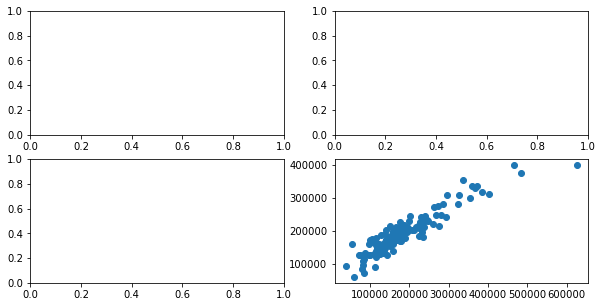

In [86]:
def analyze_linear_regression():

    regressor = LinearRegressor()
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(2, 2, figsize=(10, 5))

    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0,0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[0,1], regressor)
    plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))


if not 'linear' in args.list_of_sections_to_skip:
    analyze_linear_regression()


# check the observed largest prediction errors (need more work)

regressor = LinearRegressor()
regressor.fit(X_train, y_train)

y_predict_test = regressor.predict(X_test)
df_decile = y_test.reset_index().merge(pd.DataFrame(y_predict_test, columns=["SalePricePredicted"]),
                                       how="inner", left_index=True, right_index=True).set_index("index")
# Calculate diff between predicted and actual for test dataset
df_decile['diff'] = (df_decile.SalePrice-df_decile.SalePricePredicted)
df_decile['diff_pct'] = (df_decile.SalePricePredicted/df_decile.SalePrice)-1
df_decile = df_decile.reset_index().merge(X_train, how="inner", left_index=True,
                                          right_index=True).set_index("index")
pd.set_option('display.max_rows',
              df.shape[0]+1), df_decile.sort_values(by='diff_pct').T

38493.025022540554


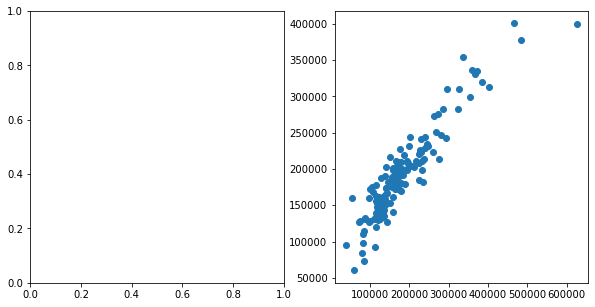

In [87]:
def analyze_ridge_regression():

    regressor = RidgeRegressor()
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))


if not 'ridge' in args.list_of_sections_to_skip:
    analyze_ridge_regression()


38515.02409906984


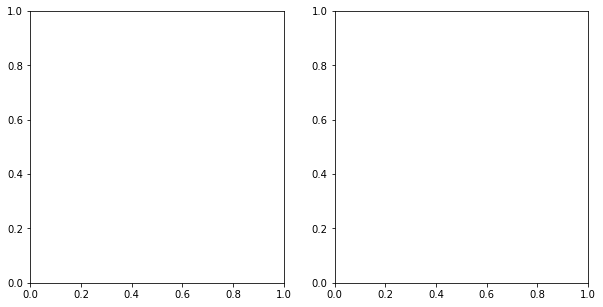

In [88]:
def analyze_lasso_regression():
    
    # TODO later use search for alpha
    regressor = LassoRegressor(alpha=0.1)
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
     #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test),squared=False))

if not 'lasso' in args.list_of_sections_to_skip:
    analyze_lasso_regression()

37566.7726099864


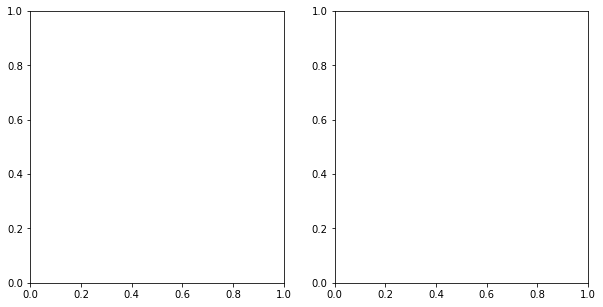

In [89]:
def analyze_elasticnet_regression():
    
    # TODO later use search for alpha
    regressor = ElasticNetRegressor(alpha=0.1, l1_ratio=0.5)
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test),squared=False))
    
if not 'elasticnet' in args.list_of_sections_to_skip:
    analyze_elasticnet_regression()

34232.24262120015


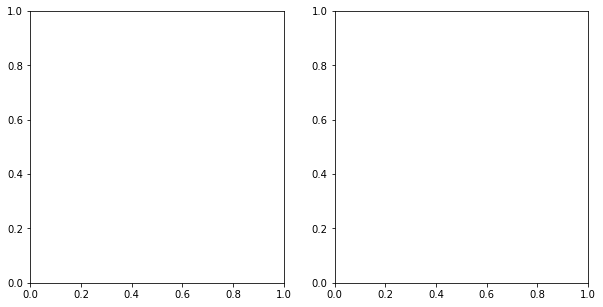

In [90]:
def analyze_decision_tree_regression():
    
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test),squared=False))

if not 'decisontree' in args.list_of_sections_to_skip:
    analyze_decision_tree_regression()

27223.793100625873


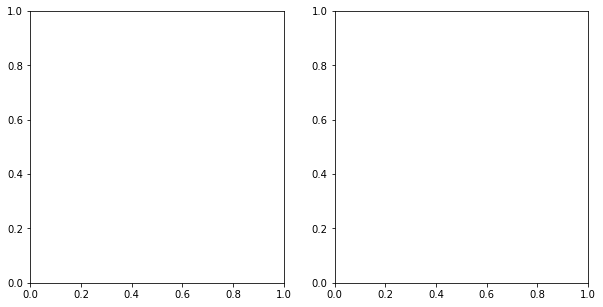

In [91]:
def analyze_random_forest_regression():
    
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test),squared=False))

if not 'randomforset' in args.list_of_sections_to_skip:
    analyze_random_forest_regression()


2. Wrapper method
recursive feature elemination process to identify features importance

In [61]:
#reset the data to all features
df_fs_w = data_loader.df
X_train_fs_w, X_test_fs_w, y_train_fs_w, y_test_fs_w = train_test_split(
    data_loader.df_X, data_loader.df_y, test_size=0.10, random_state=1)


In [62]:
X_train = data_loader.data_prep(X_train_fs_w)
y_train = y_train_fs_w
X_test = data_loader.data_prep(X_test_fs_w)
y_test = y_test_fs_w


In [63]:

def rfe_fs(regressor, threshold=30):
    ''' Select the most important * features based on the model
         and use it as X_train & X_test'''
    regressor = LinearRegression()
    selector = RFE(regressor, n_features_to_select=threshold, step=1)
    selector = selector.fit(X_train, y_train)
    selector_ind = selector.get_support()
    X_train_rfe = X_train.iloc[:, selector_ind]
    X_test_rfe = X_test.iloc[:, selector_ind]

    return X_train_rfe, X_test_rfe


46864.96884556154


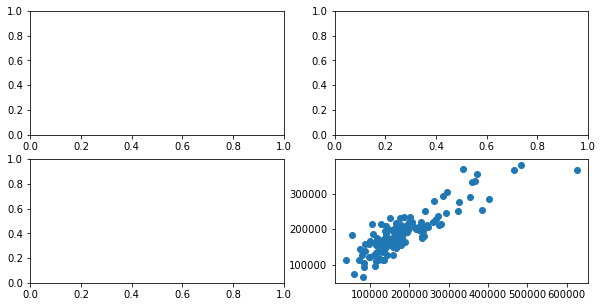

In [64]:
regressor = LinearRegressor()

X_train_rfe, X_test_rfe = rfe_fs(regressor)


def analyze_linear_regression():

    regressor = LinearRegressor()
    regressor.fit(X_train_rfe, y_train)

    # plot dignostics
    fig, axes = plt.subplots(2, 2, figsize=(10, 5))

    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0,0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[0,1], regressor)
    plt.scatter(y_test, regressor.predict(X_test_rfe))
    print(mean_squared_error(y_test, regressor.predict(X_test_rfe), squared=False))


if not 'linear' in args.list_of_sections_to_skip:
    analyze_linear_regression()


41721.99557823845


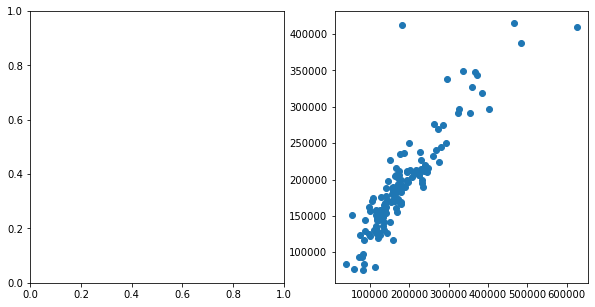

In [65]:
regressor = RidgeRegressor()

X_train_rfe, X_test_rfe = rfe_fs(regressor)


def analyze_ridge_regression():

    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))


if not 'ridge' in args.list_of_sections_to_skip:
    analyze_ridge_regression()


44305.89691490355


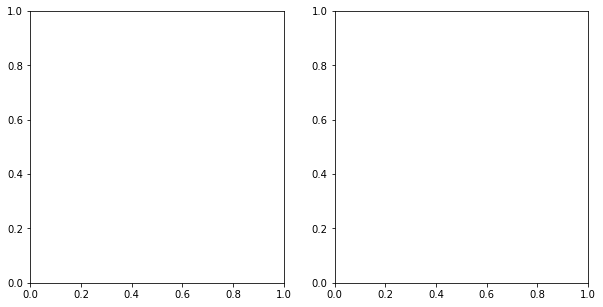

In [66]:
regressor = LassoRegressor(alpha=0.1)

X_train_rfe, X_test_rfe = rfe_fs(regressor)


def analyze_lasso_regression():

    # TODO later use search for alpha

    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    #plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))


if not 'lasso' in args.list_of_sections_to_skip:
    analyze_lasso_regression()


36316.21354783907


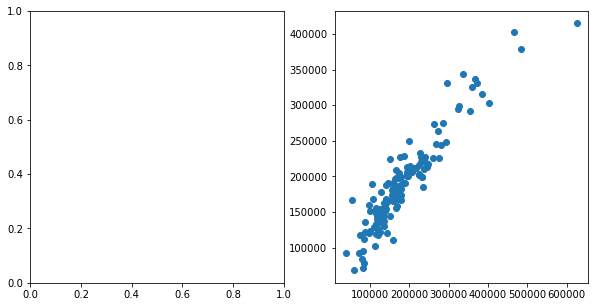

In [72]:
regressor = ElasticNetRegressor(alpha=0.1, l1_ratio=0.5)

X_train_rfe, X_test_rfe = rfe_fs(regressor)


def analyze_elasticnet_regression():

    # TODO later use search for alpha

    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))


if not 'elasticnet' in args.list_of_sections_to_skip:
    analyze_elasticnet_regression()


56642.972222678945


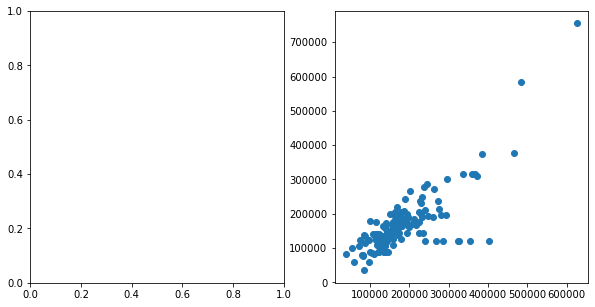

In [71]:
regressor = DecisionTreeRegressor()

X_train_rfe, X_test_rfe = rfe_fs(regressor)


def analyze_decision_tree_regression():

    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))


if not 'decisontree' in args.list_of_sections_to_skip:
    analyze_decision_tree_regression()


27816.94596809625


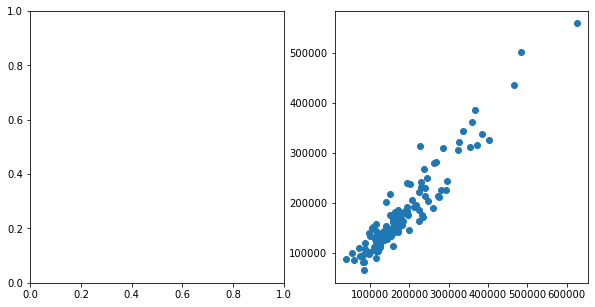

In [70]:
regressor = RandomForestRegressor()

X_train_rfe, X_test_rfe = rfe_fs(regressor)


def analyze_random_forest_regression():

    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    #BaseRegressorPlot.plot_predicted_vs_actual(axes[0], regressor)
    #BaseRegressorPlot.plot_learning_curves(axes[1], regressor)
    plt.scatter(y_test, regressor.predict(X_test))
    print(mean_squared_error(y_test, regressor.predict(X_test), squared=False))


if not 'randomforset' in args.list_of_sections_to_skip:
    analyze_random_forest_regression()


From Initial Analysis, Random Forest gives best results. We will drill down to find out possible rationale behind it so that it can help us to further calibrate the model.

# Furtherwork

The next step, we would like to explore: 

1. Applying alternative feature selection algorithms see whether it can further improve the accuracy since we observe random forest is giving us the best result.


2. Explore whether there are any additional feature engineering we could help to improve the input quality, such as reasonably remove outliers.


3. Look into otentially advanced regression techniques


4. Apply additional models such as neutral network model to see whether the predictions will be improved.